# Fundamentos de Ciencias de Datos

*Esta tarea tiene solamente una parte grupal que se encuentra en el presente cuaderno de Python.*

## Tarea 3

### Objetivos

1. Entender los conceptos básicos del área de _Machine Learning_.
2. Entender cómo medir el desempeño de un algoritmo de regresión y de un algoritmo de clasificación.
3. Familiarización con las herramientas de Python para entrenar y usar algoritmos de _Machine Learning_.

### Metodología

Deberás completar este cuaderno de python, siguiendo las instrucciones contenidas en él. Puedes utilizar contenido que encuentre en internet siempre y cuando lo referencies a través de un comentario. Por ejemplo:

>```Python
># código para abrir archivo obtenido desde  https://uniwebsidad.com/libros/algoritmos-python/capitulo-11
>archivo = open("archivo.txt")
>```

No olvides poner nombres representativos a tus variables. Caso contrario se verá reflejado en una penalización de tu nota.

### Conjuntos de Datos

Se le entregan 4 conjuntos de datos: codigos.csv, psu_2019.csv, presupuesto_2019.csv y poblacion.csv. 

#### codigos.csv

 | columna | descripción |
 | --- | :---: |
 | Código Región | **Entero**: Identificador único para cada región. |
 | Nombre Región | **String**: Nombre de la región. |
 | Abreviatura Región | **String**: Abreviatura (en letras) o nombre corto de la región.  |
 | Código Provincia | **Entero**: Identificador único para cada provincia. |
 | Nombre Provincia | **String**: Nombre de la provincia. |
 | Código Comuna 2018 | **Entero**: Identificador único para cada comuna. |
 | Nombre Comuna | **String**: Nombre de la comuna. |

 #### datos_comunas.csv

 | columna | descripción |
 | --- | :---: |
 | id | **Entero**: Identificador único para cada comuna. Mismo identificador que en **codigos.csv**. |
 | metros_plaza | **Entero**: Cantidad de metros de plaza que tiene la comuna. |
 | metros_parque | **Entero**: Cantidad de metros de parque que tiene la comuna.  |
 | personas_trabaja | **Entero**: Número de personas que trabaja en la municipalidad de la comuna. |

 #### presupuesto_2019.csv

 | columna | descripción |
 | --- | :---: |
 | CODIGO | **Entero**: Identificador único para cada comuna. Mismo identificador que en **codigos.csv**. |
 | MUNICIPIO | **String**: Nombre de la comuna. |
 | PRESUPUESTO | **Entero**: Presupuesto destinado a la comuna.  |

 **Observación**: en la columna `PRESUPUESTO`, hay datos que están como "no recepcionados. Eso puede producir que los análisis fallen, por lo que se recomienda limpiar los datos antes.

 #### poblacion.csv

 | columna | descripción |
 | --- | :---: |
 | CODIGO | **Entero**: Identificador único para cada comuna. Mismo identificador que en **codigos.csv**. |
 | MUNICIPIO | **String**: Nombre de la comuna. |
 | POBLACIÓN | **Entero**: Número de personas que vive en la comuna.  |



## Integrantes

Por favor, llenar acá el nombre de los integrantes de la pareja, junto a la asignación de las consultas de la sección A y la sección B.

- **Integrante 1**: Pía Saavedra
- **Integrante 2**: Mario Rozas

## Recomendaciones

Primero, deberías importar en la siguiente celda **TODOS** los módulos de Python necesarios para la correcta ejecución de su tarea.

In [ ]:
#Escriba su código aquí

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import datasets
import copy

Luego, deberías guardar en una (o varias) variable(s) TODOS los sets de datos que utilizarás en la tarea.

In [ ]:
#Escriba su código aquí
codigos = pd.read_csv("codigos.csv",sep=";")
comunas = pd.read_csv("datos_comunas.csv")
presupuesto = pd.read_csv("presupuesto_2019.csv",sep=";")
poblacion = pd.read_csv("poblacion.csv",sep=";")

Utilice las variables previamente guardadas para mostrar parte de la información de todos los conjuntos de datos. Vale decir, si usted creó dos variables, cada una con un conjunto de datos diferente, muestre parte de los dos conjuntos de datos. Esto te ayudará a entender mejor lo que contiene cada fuente de datos.

In [ ]:
#Escriba su código aquí
print("Datos de la variable 'codigos' ")
display(codigos.head())
print("")
print("Datos de la variable 'datos_comunas' ")
display(comunas.head())
print("")
print("Datos de la variable 'poblacion' ")
display(poblacion.head())
print("")
print("Datos de la variable 'presupuesto_2019' ")
display(presupuesto.head())

Datos de la variable 'codigos' 


,Código Región,Nombre Región,Abreviatura Región,Código Provincia,Nombre Provincia,Código Comuna 2018,Nombre Comuna
0,1,Tarapacá,TPCA,11,Iquique,1101,Iquique
1,1,Tarapacá,TPCA,11,Iquique,1107,Alto Hospicio
2,1,Tarapacá,TPCA,14,Tamarugal,1401,Pozo Almonte
3,1,Tarapacá,TPCA,14,Tamarugal,1402,Camiña
4,1,Tarapacá,TPCA,14,Tamarugal,1403,Colchane



Datos de la variable 'datos_comunas' 


,id,metros_plaza,metros_parque,personas_trabaja
0,1101,58460.0,94824.0,271.0
1,1107,130316.0,0.0,55.0
2,1401,NaN,NaN,NaN
3,1402,4050.0,0.0,8.0
4,1403,2532.0,NaN,NaN



Datos de la variable 'poblacion' 


,CODIGO,MUNICIPIO,POBLACIÓN
0,1101,IQUIQUE,216514
1,1107,ALTO HOSPICIO,124150
2,1401,POZO ALMONTE,16683
3,1402,CAMIÑA,1345
4,1403,COLCHANE,1556



Datos de la variable 'presupuesto_2019' 


,CODIGO,MUNICIPIO,PRESUPUESTO
0,1101,IQUIQUE,59072234
1,1107,ALTO HOSPICIO,13984411
2,1401,POZO ALMONTE,7613962
3,1402,CAMIÑA,1584008
4,1403,COLCHANE,2500000


Además, si necesitas hacer algún pre-procesamiento **COMÚN** a todas sus futuras respuestas, deberías hacerlo en la siguiente celda

In [ ]:
# Reemplazamos todos los "No Recepcionado" de los datos de presupuesto por un 0
presupuesto[presupuesto['PRESUPUESTO'] == 'No Recepcionado']
presupuesto = presupuesto.replace('No Recepcionado', 0)

#El presupuesto está en formato 'object', lo pasamos a 'int' para poder trabajar con él
presupuesto['PRESUPUESTO'] = presupuesto['PRESUPUESTO'].astype(int)

## Actividad

El principal objetivo de esta actividad es evaluar la capacidad de entrenar y usar algoritmos del área de _Machine Learning_. Además, vamos a evaluar que entiendas diferentes medidas de desempeño que se utilizan tanto en contextos de regresión como en contextos de clasificación.

### Parte 01 (3.5 pts) - Entrenando un algoritmo de regresión

En la primera parte de la tarea queremos que entrenes un modelo de regresión. Para esto, considera los datos municipales con los que ya has trabajado antes. Lo que tienes que hacer es un modelo de regresión lineal para predecir el presupuesto de una comuna en función de alguna de las siguientes variables:

- Metros Plaza
- Metros Parque
- Personas que Trabajan en el Municipio
- Población

Para esto, tienes que decidir tú mismo la variable con la que vas a entrenar tu modelo. **Debes justificar la elección de la variable**, para esto te tienes apoyar en las técnicas vistas en clase (ej. visualización de los datos, cálculo de correlación, etc.). Luego de eso, debes medir el desempeño de dos formas: 

- Primero, mide el desempeño del regresor usando _cross-validation_, considerando `cv=5`. Utiliza la métrica `neg_mean_squared_error`.
- Segundo, computa la predicción sobre todo el _dataset_ y luego calcula la métrica $R^2$. Puedes ver cómo importar y usar esta métrica [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html).

En base a las métricas de desempeño calculadas, discute qué tan bueno es tu modelo y cómo crees que podría mejorar.

---

La distribución de puntaje de esta pregunta es la siguiente:

- **0.75 pto**. Escoger la variable con la que se va a predecir el presupuesto comunal.
- **0.75 pto**. Entrenar la regresión en Scikit-Learn.
- **1 pto**. Cálcular las medidas de desempeño solicitadas.
- **1 pto**. Análisis de los resultados.

### Parte 02 - Entrenando un clasificador

En esta parte de la tarea vamos a entrenar un clasificador binario. Para esto vamos a utilizar el _dataset_ de las **Flores Iris** visto en clase (lo importamos en la celda correspondiente a esta pregunta). La idea es que utilizando la clase `SGDClassifier` entrenes un clasificador que prediga si una flor es o no una **Iris Virginica** en función de las cuatro _features_ del _dataset_ (largo y ancho del pétalo y sépalo). Para esto debes dividir el _dataset_ en una parte de entrenamiento, cuyo tamaño debe ser 70% del _dataset_, y otra de prueba, que corresponde al 30% restante del _dataset_. 

Luego, debes calcular el _accuracy_, _precision_ y _recall_ de tu clasificador. En base a estas métricas debes discutir qué tan bueno es tu clasificador y cómo crees que puede mejorar. Además, se pide que describas dos situaciones ficticias, una en la que el clasificador debería privilegiar la precisión por sobre el _recall_ y otra situación en donde se debería privilegiar el _recall_ por sobre la precisión.

---

La distribución de puntaje de esta pregunta es la siguiente:

- **1 pto**. Entrenar el clasificador.
- **1 pto**. Cálculo de las medidas de desempeño y la discusión de los resultados.
- **0.5 pts**. Descripción de las situaciones ficticias.

## Detalles académicos

La nota de cada integrante de la pareja será calculada como la suma de los puntos obtenidos en la tarea más un punto base. **La tarea debe ser subida al buzón correspondiente de Webcursos hasta el 02 de noviembre a las 23:59 horas**.

## Pregunta 1

In [ ]:
# Continúa la solución acá

#Hacemos varios merge para juntar todo en un mismo dataset

datos = pd.merge(codigos,comunas,left_on="Código Comuna 2018",right_on="id",how="outer")
datos = pd.merge(datos , presupuesto,left_on="Código Comuna 2018",right_on="CODIGO",how="outer")
datos =pd.merge(datos , poblacion,left_on="Código Comuna 2018",right_on="CODIGO",how="outer")

#Sacamos las variables que interesan
datos= datos[["Nombre Región","Nombre Provincia","Nombre Comuna","metros_plaza","metros_parque","personas_trabaja","PRESUPUESTO","POBLACIÓN"]]
datos.head()

,Nombre Región,Nombre Provincia,Nombre Comuna,metros_plaza,metros_parque,personas_trabaja,PRESUPUESTO,POBLACIÓN
0,Tarapacá,Iquique,Iquique,58460.0,94824.0,271.0,59072234.0,216514.0
1,Tarapacá,Iquique,Alto Hospicio,130316.0,0.0,55.0,13984411.0,124150.0
2,Tarapacá,Tamarugal,Pozo Almonte,NaN,NaN,NaN,7613962.0,16683.0
3,Tarapacá,Tamarugal,Camiña,4050.0,0.0,8.0,1584008.0,1345.0
4,Tarapacá,Tamarugal,Colchane,2532.0,NaN,NaN,2500000.0,1556.0


Veamos la correlación entre las distintas variables.

In [ ]:
display(datos.corr())

,metros_plaza,metros_parque,personas_trabaja,PRESUPUESTO,POBLACIÓN
metros_plaza,1.000000,-0.005430,0.065125,0.089088,0.106234
metros_parque,-0.005430,1.000000,-0.008201,-0.007577,-0.017666
personas_trabaja,0.065125,-0.008201,1.000000,0.835009,0.843984
PRESUPUESTO,0.089088,-0.007577,0.835009,1.000000,0.777995
POBLACIÓN,0.106234,-0.017666,0.843984,0.777995,1.000000


La mayor correlación para presupuesto, es con Personas_trabaja y luego con población.

Ahora grafiquemos ambas para ver cual es mejor para utilizar.

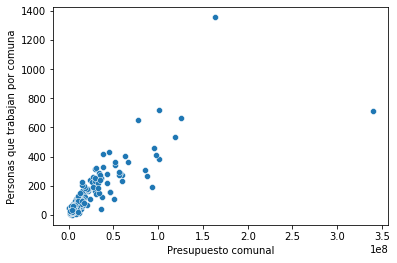

In [ ]:
#Graficamos
graf1 = sns.scatterplot(data=datos, x="PRESUPUESTO", y="personas_trabaja")
x1 = plt.xlabel("Presupuesto comunal")
y1 = plt.ylabel("Personas que trabajan por comuna")
plt.show()

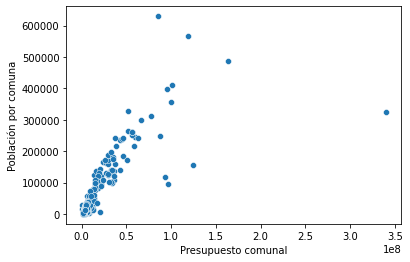

In [ ]:
#Graficamos
graf1 = sns.scatterplot(data=datos, x="PRESUPUESTO", y="POBLACIÓN")
x1 = plt.xlabel("Presupuesto comunal")
y1 = plt.ylabel("Población por comuna")
plt.show()

En este caso, es mejor trabajar con los datos de 'personas_trabaja', ya que tiene una mayor correlación, y graficamente no se puede determinar nada más que lo antes visto, ya que son parecidos, pero hay una relación más directa entre 'PRESUPUESTO' y 'personas_trabaja', y hay menos outliers.

In [ ]:
#Importamos lo necesario
from sklearn.model_selection import train_test_split

#Usamos solo la columnas con los datos que nos importan
model = datos[["personas_trabaja","PRESUPUESTO"]]

#Eliminamos las filas con 0s
model = model.dropna(axis=0)

#Indicamos los datos para que el programa entrene, junto con el tamaño de prueba
train_set, test_set = train_test_split(model, test_size=0.3)

In [ ]:
#Importamos lo necesario
from sklearn.linear_model import LinearRegression

#Le indicamos cuales son los sets de entrenamiento usados
X_train = train_set[["personas_trabaja"]]
y_train = train_set[["PRESUPUESTO"]]

#Se usa regresión lineal
lin_reg = LinearRegression()

#Se le indica lo anterior para que el programa ajuste la curva
lin_reg.fit(X_train, y_train)

#Predecimos algunos valores, se le da valores de personas que trabajan en una comuna, y da una matriz en orden con el presupuesto esperado
lin_reg.predict([[10], [50], [100], [250], [500], [1000]])

array([[-3.12821583e+06],
       [ 5.94736915e+06],
       [ 1.72918504e+07],
       [ 5.13252941e+07],
       [ 1.08047700e+08],
       [ 2.21492512e+08]])

Ahora se verá que tan bueno es el modelo, primero a traves de crossvalidation, y luego con $R^2$.

In [ ]:
#Importamos lo necesario del crossvalidation
from sklearn.model_selection import cross_val_score

#Usamos lo mismo que antes
lin_reg = LinearRegression()

X = model[["personas_trabaja"]]
y = model[["PRESUPUESTO"]]

#Ahora vemos los puntajes, usando 'neg_mean_squared_error' y cv=5
scores = cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=5)

#Se saca la raiz a los valores del scores pero se multiplica por menos por que es negativo
lin_rmse_scores = np.sqrt(-scores)

#Imprimimos los valores
print(lin_rmse_scores)

#Se muestran la media y la desviacion del modelo y sus particiones
print(lin_rmse_scores.mean())
print(lin_rmse_scores.std())

[ 9062758.19543624  4193843.92307368  6797038.50189543 30812479.09068576
 12458046.92651112]
12664833.327520449
9471466.942602236


In [ ]:
#Ahora veamos los datos del presupuesto
datos[['PRESUPUESTO']].describe()

,PRESUPUESTO
count,3.450000e+02
mean,1.413407e+07
std,2.740327e+07
min,0.000000e+00
25%,3.188141e+06
50%,5.372994e+06
75%,1.225000e+07
max,3.399804e+08


La media del presupuesto es de 14.134.070 millones, y vemos que en el cross validation dice que es de 12.663.833 millones aprox., lo cual están muy cerca, siendo está ultima menor a la realidad.

La desviación estandar de los datos de presupuesto corresponde a 27.403.270 millones de pesos, mientras que la del cross validation es de 9.471.466,9 milllones de pesos, algo muy inferior a la realidad.

Según estos 2 puntos, se puede sacar que el modelo es bueno, aunque con cross validation no se puede ver tan claramente el desempeño.

Ahora veamos con $R^2$: 

In [ ]:
#Ahora para calcular el R2, importamos lo necesario
from sklearn.metrics import r2_score

#Hacemos lo mismo que antes, predecimos y mostramos el R2
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)
r2_score(y, y_pred)

0.6972395105011326

Vemos que el modelo se explica en un 69.72 %
.



### Como puede mejorar:

El modelo es bueno, ya que explica lo que buscamos en un 69.72%, un buen valor, ya que es mayor por buena diferencia a un 50%. Esto no significa que no sea mejorable, 

Una buena forma de mejorar el modelo que prediga el presupuesto de una comuna en base a las personas que trabajan en ella, es además considerar la variable 'población' (que tiene una correlación parecida con el presupuesto) en el modelo, para así estimar de manera más precisa el presupuesto comunal, que serviría como apoyo a la variable de 'personas_trabaja'.



## Pregunta 2

In [ ]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
iris.keys()
df = pd.DataFrame(iris['data'])
df.columns = iris.feature_names
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# Recuerda que las flores Virgínica son las de tipo 2
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Continúa la solución acá

#Pasamos a dataframe los tipo de flores y los unimos al dataset correspondiente
tipo_flores = pd.DataFrame(iris['target'])
df.insert(4, "Tipo de flores", tipo_flores, allow_duplicates=False)
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Tipo de flores
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Como solo necesitamos saber si las flores son o no son de tipo 2, pasamos la variable 'Tipos de flores' a una variable binaria, que solo puede tomar valores de 0 y 1, siendo 0 cuando no es de tipo 2, y 1 cuando si lo es.

In [ ]:
#Ahora cambiamos valores, las flores tipos 0 y 1 tendrán valor '0' y las flores tipo 2 tendrán valores tipo '1'
df['Tipo de flores'] = df['Tipo de flores'].replace(1, 0)
df['Tipo de flores'] = df['Tipo de flores'].replace(2, 1)

In [ ]:
Luego hacemos el modelo.

In [ ]:
#Divimos en X e y, con los datos correspondientes y los entrenamos con un test size = 0.3
X, y = df[['sepal length (cm)','sepal width (cm)', 'petal length (cm)','petal width (cm)' ]], df[['Tipo de flores']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
#Importamos el clasificador
from sklearn.linear_model import SGDClassifier

#Modelo a entrenar
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)


#Predecimos
y_pred = sgd_clf.predict(X_test)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1])

Calculamos la matriz de confusión, y vemos las caracteristicas del modelo. 

In [ ]:
#Calculamos matriz de confusión
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[28  2]
 [ 0 15]]


De lo cual sacamos que hay 28 verdaderos positivos, 2 falsos positivos, 0 falso negativos y 15 verdaderos negativos.

In [ ]:
#Calculamos accuracy
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9555555555555556


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

#Calculamos precision
print(precision_score(y_test, y_pred))

0.8823529411764706


In [ ]:
#Calculamos recall
print(recall_score(y_test, y_pred))

1.0


Según estos parametros, el modelo es bastante bueno, ya que los valores son altos, tiene una alta tasa de 'accuracy', siendo casi de un 100%. El modelo es casi perfecto, por lo que mejorarlo puede depender de la muestra que tome, en este caso, no seria necesario una mejora.

Si hubiera que mejorarlo si o si, o dar alguna propuesta, estas podrian ser algunas:

-Cambiar el número de muestra.

-Tomar menos variables, en vez de las 4, 3 por ejemplo.

-Añadir nuevas mediciones, como el tamaño del tallo para ser más precisos, entre otras cosas.

Todas estas deben ser probadas para determinar si son o no una mejora.


### Situaciones ficticias.

Una situación donde necesitemos que la precisión ser mayor que el recall, es que las flores tipo 2 sean un tipo de flor especial que se usa en un medicamento, mientras que las de tipo 0 y 1 son venenosas. Nosotros necesitamos flores de tipo 2 para hacer muchos medicamentos, pero no podemos hacer medicamentos con veneno porque eso mataría al paciente, por lo que la precisión debe ser la mayor posible, sin importar que se escogan menos flores, ya que las pocas que escogamos deben ser si o si de tipo 2.

Una situación donde necesitemos que el recall sea mayor que la precisión, es que exista una plaga de flores tipo 2, donde estas consumen mucha agua en el entorno, por lo que deben ser sacadas lo antes posible para evitar un mal mayor. En este caso no importa si tambien se saca alguna que otra flor de tipo 0 o 1, ya que se prefiere sacar todas las de tipo 2 para hacer que la plaga desaparezca, y una o dos flores que se quiten de manera erronea no es peor que una sequia.